# **Netflix-ExploratoryDataAnalysis**

# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assigning the Excel file to a dataframe

In [6]:
df = pd.read_excel("Netflix_Titles.xlsx")

# Checking first 5 rows of the dataframe

In [ ]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


# Checking last 5 rows of the dataframe

In [7]:
df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.3
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.0
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,7,"['family', 'animation', 'comedy']",[],1.0,tt13711094,7.8,18.0,2.289,10.0


# Overhead View of the dataframe

In [8]:
#Getting the information about our dataset to know how many
#null value are there and what are the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

# Dropping the unnecessary columns

In [9]:
#These column are of no use in our analysis, so dropping them
df = df.drop(columns = ["id", "description", 'production_countries',
                        'imdb_id', 'tmdb_popularity', 'tmdb_score', 'seasons'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5849 non-null   object 
 1   type               5850 non-null   object 
 2   release_year       5850 non-null   int64  
 3   age_certification  3231 non-null   object 
 4   runtime            5850 non-null   int64  
 5   genres             5850 non-null   object 
 6   imdb_score         5368 non-null   float64
 7   imdb_votes         5352 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 365.8+ KB


# Renaming Column as per need

In [10]:
#Renaming column as it's name was unnecessary big
df = df.rename(columns = {'age_certification': 'rating'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         5849 non-null   object 
 1   type          5850 non-null   object 
 2   release_year  5850 non-null   int64  
 3   rating        3231 non-null   object 
 4   runtime       5850 non-null   int64  
 5   genres        5850 non-null   object 
 6   imdb_score    5368 non-null   float64
 7   imdb_votes    5352 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 365.8+ KB


# Returning description of the data

In [11]:
df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,5850.000000,5850.000000,5368.000000,5.352000e+03
mean,2016.417094,76.888889,6.510861,2.343938e+04
std,6.937726,39.002509,1.163826,9.582047e+04
min,1945.000000,0.000000,1.500000,5.000000e+00
25%,2016.000000,44.000000,5.800000,5.167500e+02
50%,2018.000000,83.000000,6.600000,2.233500e+03
75%,2020.000000,104.000000,7.300000,9.494000e+03
max,2022.000000,240.000000,9.600000,2.294231e+06


# Checking the shape of dataframe

In [12]:
df.shape

(5850, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         5849 non-null   object 
 1   type          5850 non-null   object 
 2   release_year  5850 non-null   int64  
 3   rating        3231 non-null   object 
 4   runtime       5850 non-null   int64  
 5   genres        5850 non-null   object 
 6   imdb_score    5368 non-null   float64
 7   imdb_votes    5352 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 365.8+ KB


# Checking the dataframe for unique values

In [14]:
#We get to know how much unique values are in our data so we can proceed further accordingly
df.nunique()

title           5798
type               2
release_year      63
rating            11
runtime          202
genres          1726
imdb_score        80
imdb_votes      3880
dtype: int64

# Checking how many null values are in our dataframe

In [15]:
#Checking count of null values and we found out that one title row is null, removing it would be better
df.isnull().sum()

title              1
type               0
release_year       0
rating          2619
runtime            0
genres             0
imdb_score       482
imdb_votes       498
dtype: int64

# Returning the specific row which contains the null title

In [16]:
#Returning the row which contained null value in our title column
df[df['title'].isnull()]

,title,type,release_year,rating,runtime,genres,imdb_score,imdb_votes
1704,NaN,MOVIE,2015,NaN,11,[],NaN,NaN


# Dropping the row with the null title

In [17]:
df = df.drop(1704)

In [ ]:
df.isnull().sum()

title              0
type               0
release_year       0
rating          2618
runtime            0
genres             0
imdb_score       481
imdb_votes       497
dtype: int64

# Filling null values in Rating column with Not Rated


In [18]:
df['rating'].fillna('Not Rated')

0           TV-MA
1               R
2               R
3              PG
4       Not Rated
          ...    
5845    Not Rated
5846    Not Rated
5847    Not Rated
5848        PG-13
5849    Not Rated
Name: rating, Length: 5849, dtype: object

In [19]:
df['rating'] = df['rating'].fillna('Not Rated')
df.isnull().sum()

title             0
type              0
release_year      0
rating            0
runtime           0
genres            0
imdb_score      481
imdb_votes      497
dtype: int64

# Checking for outliers

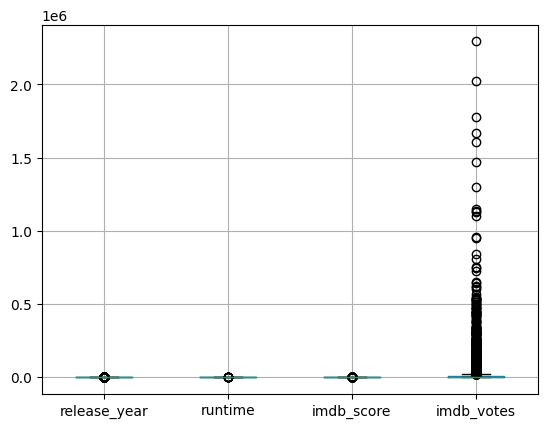

In [20]:
df.boxplot()
plt.rcParams['figure.figsize'] = (7,5)

# Overhead view of data after cleaning and transforming data

In [21]:
#Now our data is clean and have null values only in imdb_scores and imdb_votes which can be fixed while working
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5849
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         5849 non-null   object 
 1   type          5849 non-null   object 
 2   release_year  5849 non-null   int64  
 3   rating        5849 non-null   object 
 4   runtime       5849 non-null   int64  
 5   genres        5849 non-null   object 
 6   imdb_score    5368 non-null   float64
 7   imdb_votes    5352 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 411.3+ KB


# Visualization of Top 10 Netflix Titles by IMDB_score

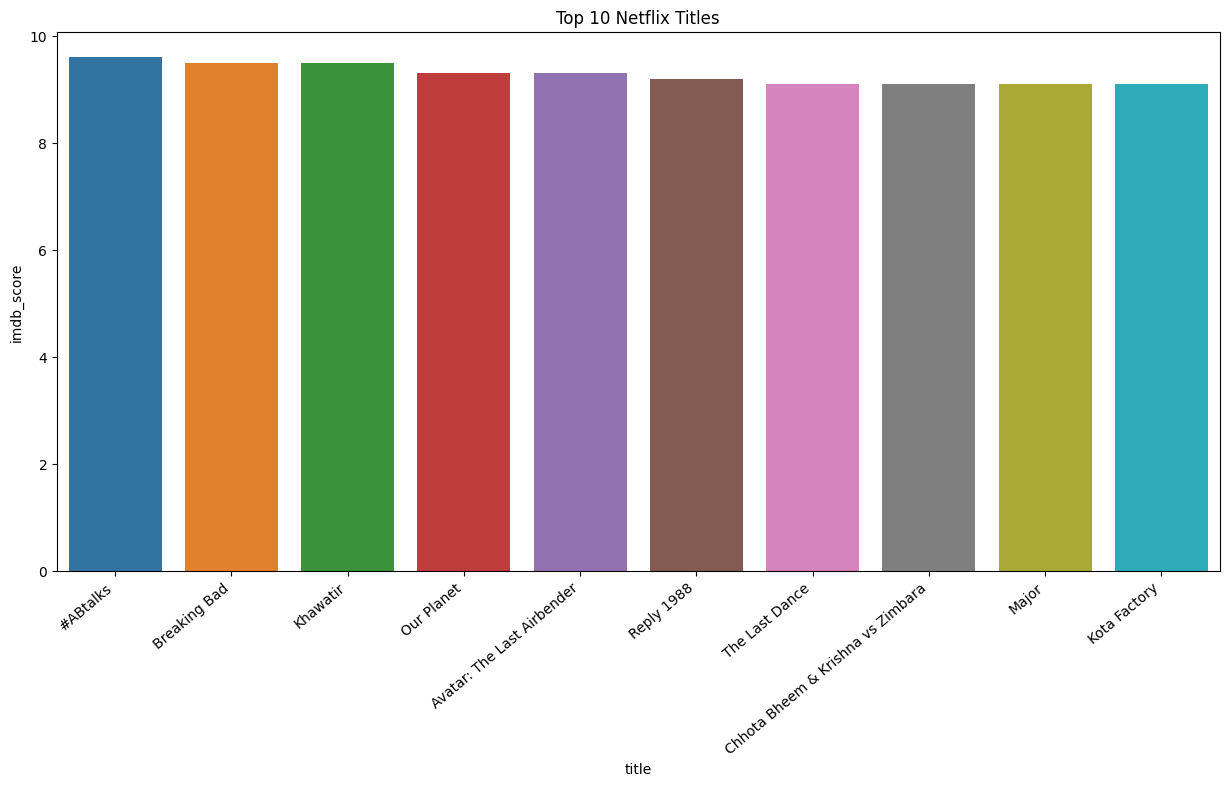

In [24]:
#Sorting the dataframe to get top ten titles of Netflix whether its movie or a show
#What title is top or bottom is decided by their respective imdb_scores
top_10_titles = df.sort_values(by = 'imdb_score', ascending = False).head(10)
ax = sns.barplot(x = 'title', y = 'imdb_score', data = top_10_titles)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Top 10 Netflix Titles')
plt.rcParams['figure.figsize'] = (15,7)


# Visualization of Bottom 10 Netflix Titles by IMDB_score

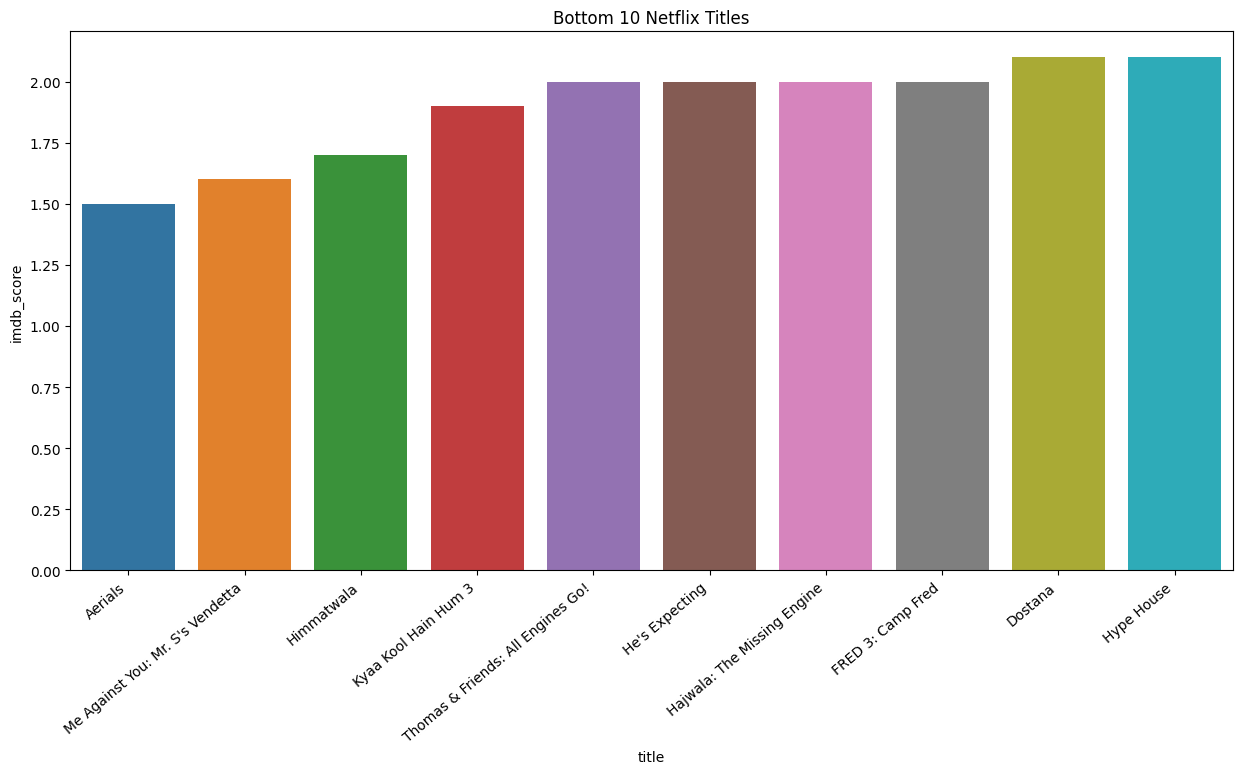

In [25]:
##Sorting the dataframe to get bottom ten titles of Netflix
bottom_10_titles = df.sort_values(by = 'imdb_score', ascending = True).head(10)
ax = sns.barplot(x = 'title', y = 'imdb_score', data = bottom_10_titles)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Bottom 10 Netflix Titles')
plt.rcParams['figure.figsize'] = (15,7)

# Visualization of the count of Netflix shows and Movies

Text(0.5, 1.0, 'Count of Shows And Movies')

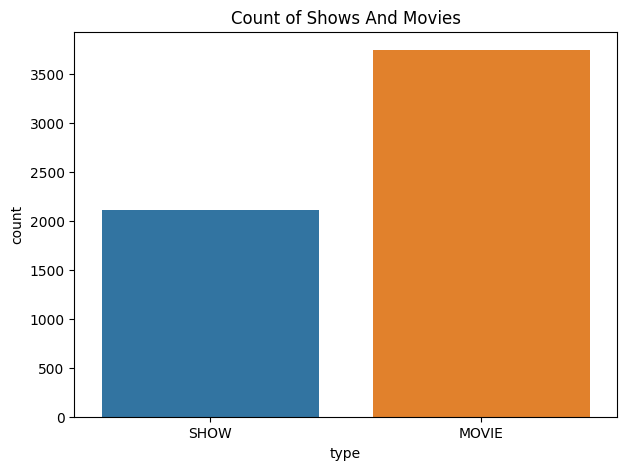

In [ ]:

sns.countplot(x="type",data=df)
plt.rcParams['figure.figsize'] = (7,5)
plt.title('Count of Shows And Movies')

# Visualization of count of different age ratings shows

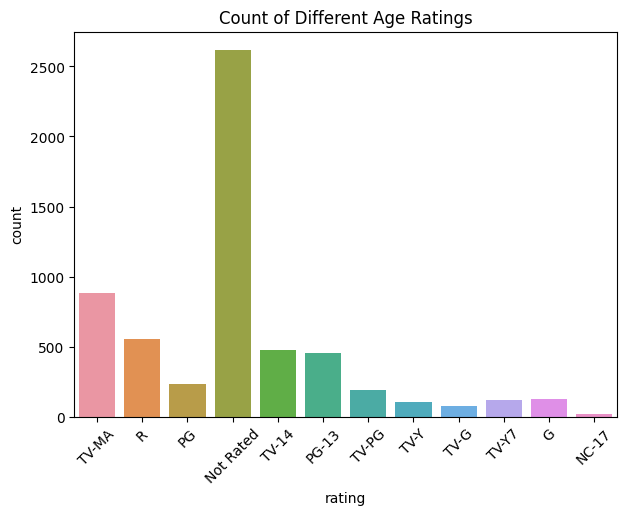

In [ ]:
sns.countplot(x="rating",data=df)
plt.xticks(rotation=45)
plt.title('Count of Different Age Ratings')
plt.rcParams['figure.figsize'] = (7,5)
plt.show()

# IMDB Score difference between Shows and Movies

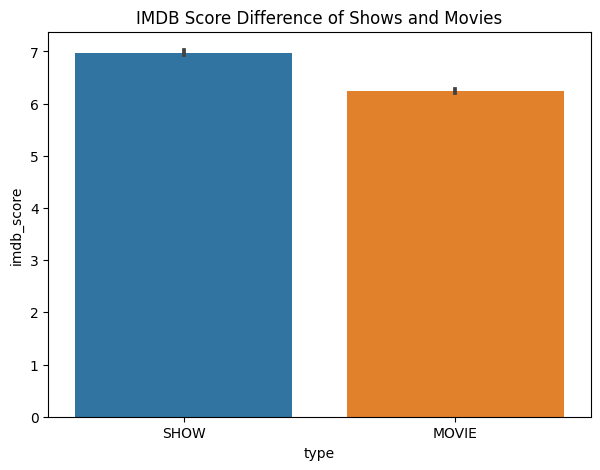

In [ ]:
sns.barplot(x="type",y="imdb_score",data=df)
plt.title('IMDB Score Difference of Shows and Movies')
plt.rcParams['figure.figsize'] = (7,5)

In [ ]:
#Replacing the Genre which was empty brackets with Not Given
df['genres'] = df['genres'].replace('[]', 'Not Given')

# Visualizing Top 10 Netflix Genres

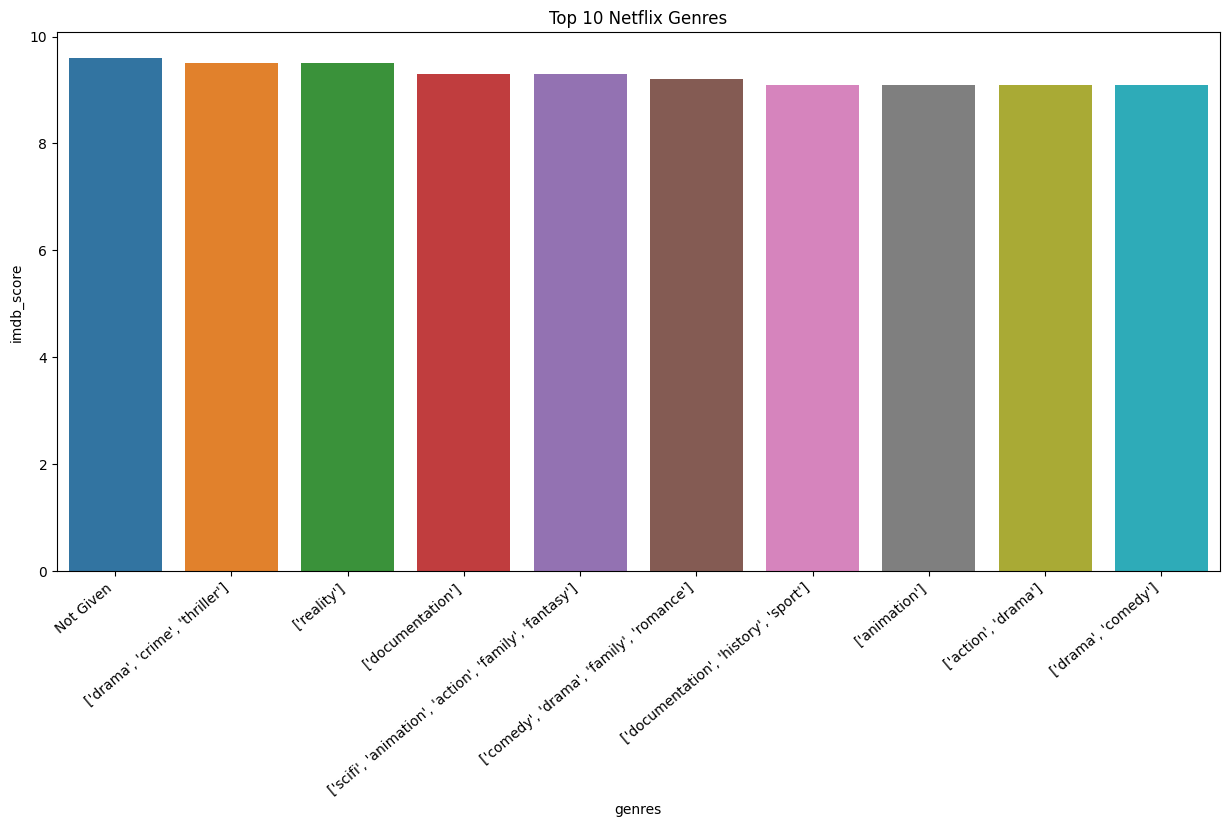

In [ ]:
top_10_genres = df.sort_values(by = 'imdb_score', ascending = False).head(10)
ax = sns.barplot(x = 'genres', y = 'imdb_score', data = top_10_genres)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Top 10 Netflix Genres')
plt.rcParams['figure.figsize'] = (15,7)


### **Conclusion - After performing data analysis on our dataset, it is evident that 'ABTalks' show is the top rated Netflix show while 'Aerials' being the least rated. Netflix has a large collection of movies(around 3800) whereas shows are about 2200 but the IMDB ratings of shows are higher than movies. Apart from the genre that is missing, Netflix users prefer 'Drama, Crime and Thriller' genres the most.**